In [1]:
from tensorflow.keras.layers import Input ,Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [2]:
(x_train,_),(x_test,_)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

In [4]:
print(x_train.shape)
x_test.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

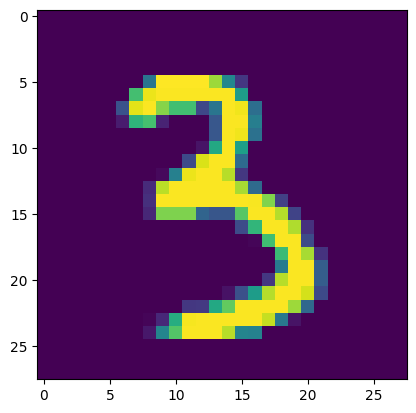

In [5]:
plt.imshow(x_test[32])

In [6]:
noise_factor=0.5

x_train_noisy=x_train + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train__noisy=np.clip(x_train_noisy,0.,1.)
x_test__noisy=np.clip(x_test_noisy,0.,1.)


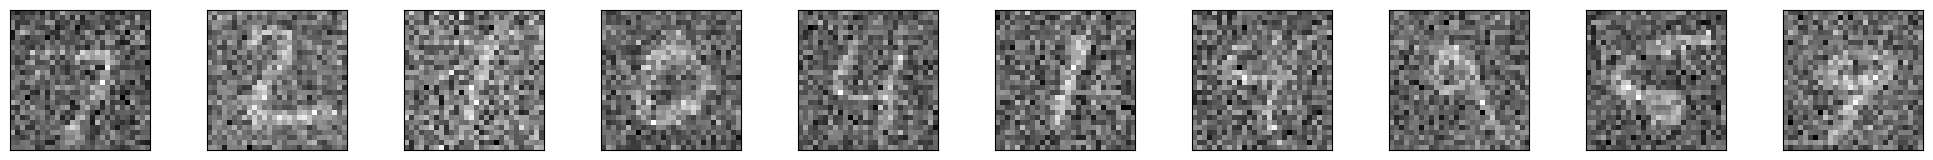

Gürültülü Örijinal Görüntüler


In [7]:

n=10
plt.figure(figsize=(25,4))

for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print("Gürültülü Örijinal Görüntüler")

Encode Kısmı

In [8]:
input_img=Input(shape=(28,28,1))

x=Conv2D(32,(3,3),activation="relu",padding="same")(input_img)
x=MaxPooling2D((2,2),padding="same")(x)
x=Conv2D(32,(3,3),activation="relu",padding="same")(x)

encoded=MaxPooling2D((2,2),padding="same")(x)

#(7,7,32)

DECODE Kısmı

In [9]:
x=Conv2D(32,(3,3),activation="relu",padding="same")(encoded)
x=UpSampling2D((2,2))(x)
x=Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=UpSampling2D((2,2))(x)
decoded=Conv2D(1,(3,3),activation="sigmoid",padding="same")(x)

In [14]:
print(f"x_train_noisy shape: {x_train_noisy.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train_noisy shape: (60000, 28, 28, 1)
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


MODELİN DERLENMESİ


In [15]:
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer="adadelta",loss="binary_crossentropy")
autoencoder.fit(x_train_noisy,x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_train__noisy,x_train),
                callbacks=[TensorBoard(log_dir='/tmp/tb',histogram_freq=0,write_graph=False)])
decoded_imgs=autoencoder.predict(x_test)

Epoch 1/10
469/469 [==============================] - 217s 460ms/step - loss: 0.6525 - val_loss: 0.6498
Epoch 2/10
469/469 [==============================] - 221s 472ms/step - loss: 0.5966 - val_loss: 0.5990
Epoch 3/10
469/469 [==============================] - 208s 445ms/step - loss: 0.5332 - val_loss: 0.5501
Epoch 4/10
469/469 [==============================] - 217s 463ms/step - loss: 0.4975 - val_loss: 0.5272
Epoch 5/10
469/469 [==============================] - 215s 459ms/step - loss: 0.4787 - val_loss: 0.5185
Epoch 6/10
469/469 [==============================] - 206s 439ms/step - loss: 0.4618 - val_loss: 0.5143
Epoch 7/10
469/469 [==============================] - 214s 456ms/step - loss: 0.4439 - val_loss: 0.5115
Epoch 8/10
469/469 [==============================] - 216s 460ms/step - loss: 0.4229 - val_loss: 0.5114
Epoch 9/10
469/469 [==============================] - 207s 441ms/step - loss: 0.3964 - val_loss: 0.5156
Epoch 10/10
313/313 [==============================] - 7s 20ms/s

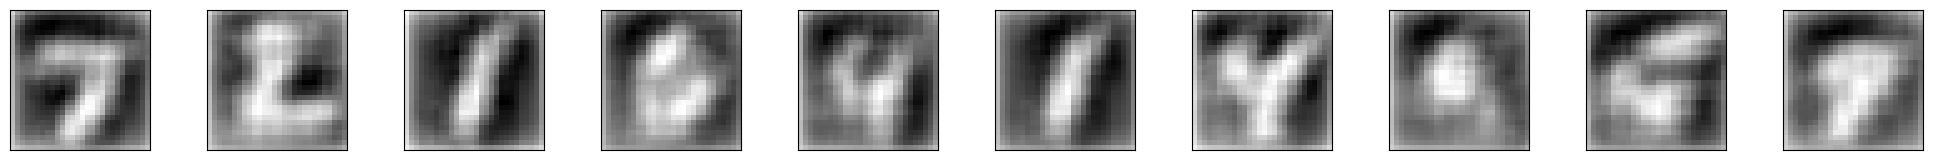

Gürültüsü Baştırılmış Görüntüler


In [90]:
n=10
plt.figure(figsize=(25,4))

for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print("Gürültüsü Baştırılmış Görüntüler")

In [21]:
#autoencoder.save("save_model/autoencoder_10e_128bs.h5")

Kendi Fotğrafını Gürültüden arındırma

In [18]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive
import os
os.chdir("/gdrive/My Drive/colab_calisma_ortami")

Mounted at /gdrive
/gdrive


In [69]:
from PIL import Image

img = Image.open("yakin_foto.jpg")
#img_resized = img.resize((28, 28))
img_grayscale = img.convert('L')


In [70]:
img_array = np.array(img_grayscale)
img_array = img_array.reshape(1,28, 28, 1)

In [95]:
img_array=img_array.astype("float32")/255

In [99]:
y_pred=autoencoder.predict(img_array)

1/1 [==============================] - 0s 26ms/step


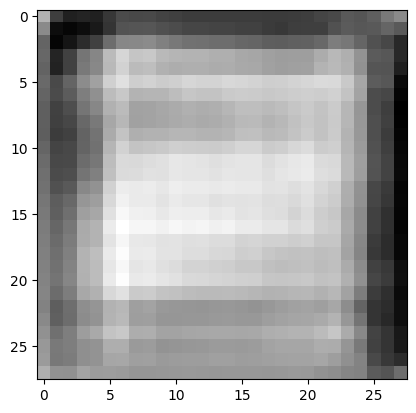

In [103]:
plt.imshow(y_pred.reshape(28,28,1))